In [1]:
!pip install seaborn
!pip install wordcloud
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 153.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 180.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 153.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 165.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 25.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [3]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"


In [4]:
course_df = pd.read_csv(course_genre_url)

In [5]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [6]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [7]:
genre_count = pd.DataFrame(course_df[genres].sum().sort_values(ascending=False))
genre_count.columns = ['Count']

In [8]:
genre_count.head()

,Count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38


/tmp/ipykernel_776/3137530005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=genre_count.index, y=genre_count.Count, data=genre_count, hue_norm=True, palette="Set1")
/tmp/ipykernel_776/3137530005.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)


Text(0, 0.5, 'Course Count')

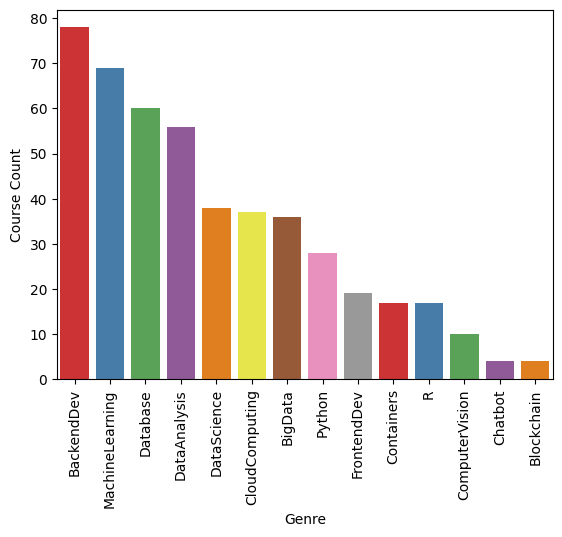

In [9]:
plot = sns.barplot(x=genre_count.index, y=genre_count.Count, data=genre_count, hue_norm=True, palette="Set1")
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
plot.set_xlabel("Genre")
plot.set_ylabel("Course Count")

In [10]:
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
ratings_df = pd.read_csv(ratings_url)

In [11]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [12]:
user_ratings = ratings_df.groupby(by=['user']).size().reset_index()

In [13]:
user_ratings = user_ratings.rename(columns={0: "rating_count"})

In [14]:
user_ratings.head()

,user,rating_count
0,2,61
1,4,44
2,5,59
3,7,1
4,8,3


Text(0, 0.5, 'Count')

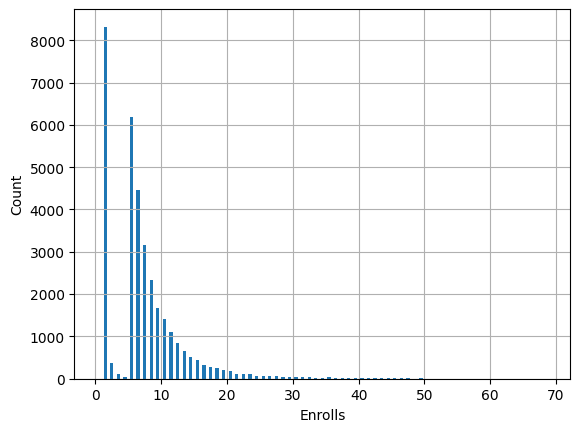

In [15]:
ax = user_ratings.rating_count.hist(bins=range(0,70,1), rwidth=.5)
ax.set_xlabel('Enrolls')
ax.set_ylabel('Count')

In [16]:
course_ratings = ratings_df.groupby(['item']).size().reset_index()
course_ratings.columns=['course','Ratings']
course_ratings = course_ratings.sort_values(by='Ratings',ascending=False).reset_index(drop=True)
course_ratings.iloc[:20]

,course,Ratings
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


In [17]:
course_ratings_merged = pd.merge(course_ratings, course_df[['COURSE_ID','TITLE']], 
                                 left_on='course', right_on='COURSE_ID', how='left')
course_ratings_merged = course_ratings_merged.rename(columns={"Ratings":"Enrolls"})

In [18]:
course_ratings_merged.iloc[:20,[3,1]]

,TITLE,Enrolls
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


In [19]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [20]:
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [21]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [22]:
wordcloud.generate(titles)

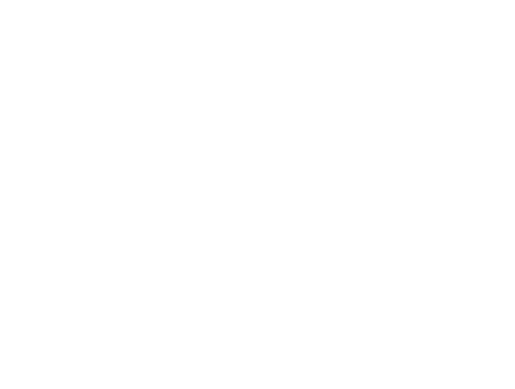

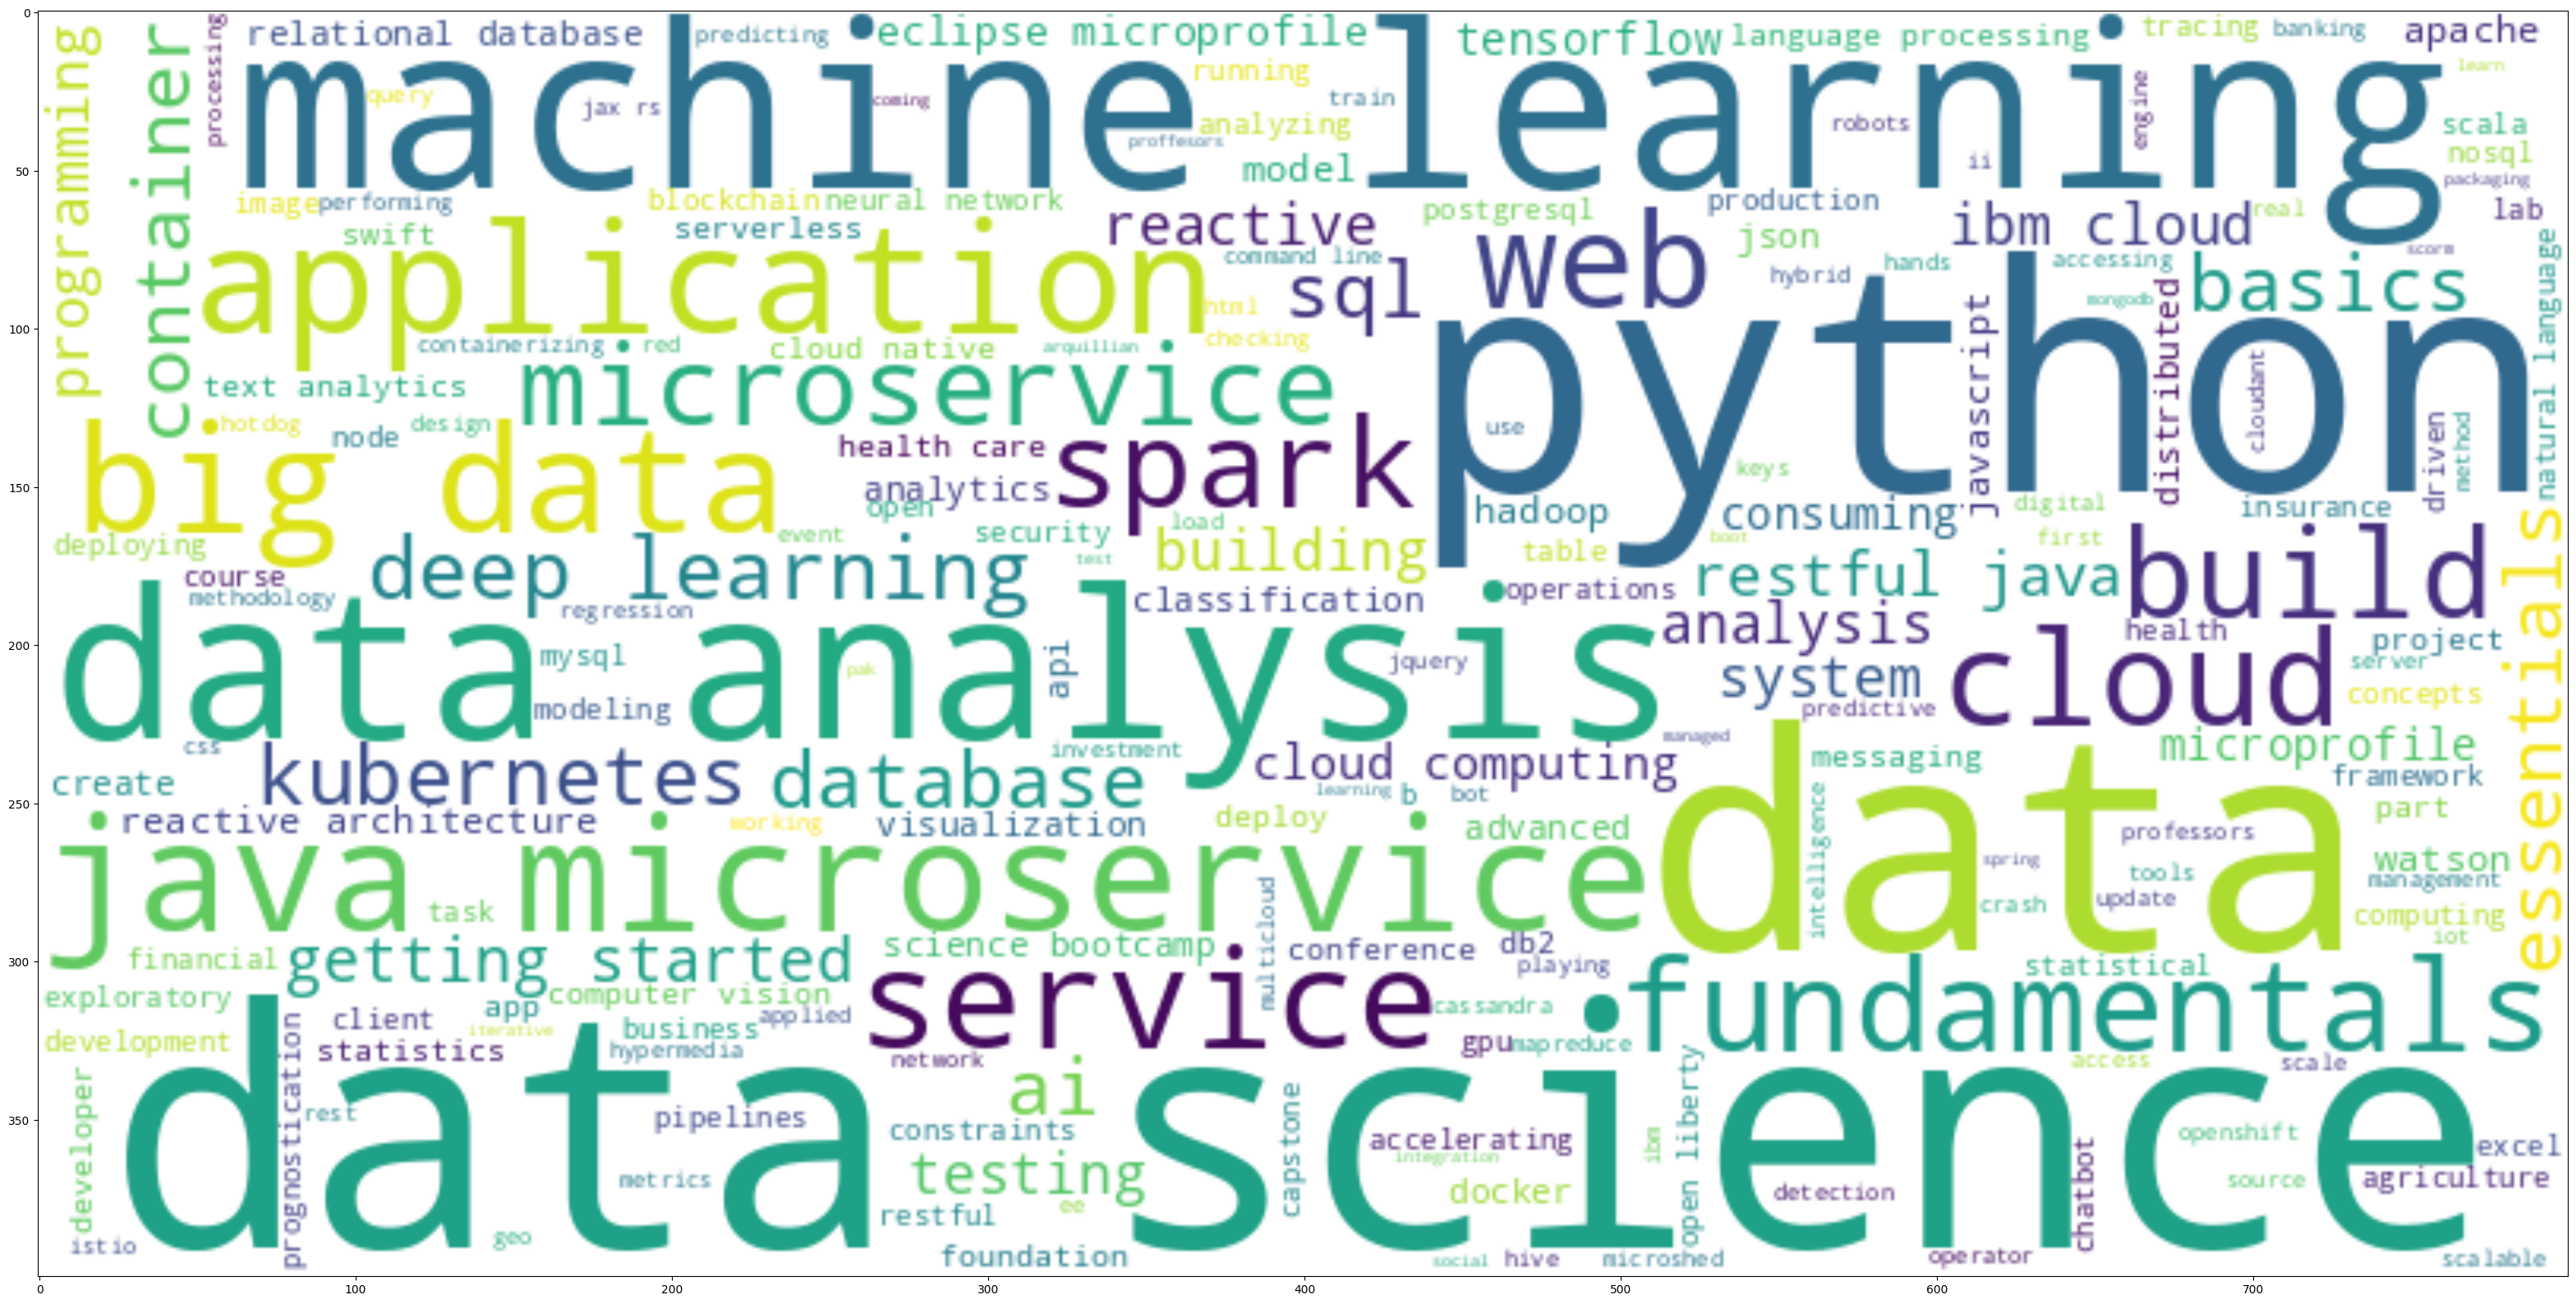

In [23]:
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()